# PREDICTING THE LEVELS OF ATTENTION

## INITIAL TASK

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [89]:
df=pd.read_csv("train_data.csv") #READING THE DATASET

In [90]:
df["remarks"] = "" #DEFINING NEW REMARK ROW
df["remarks"] = df["remarks"].astype(str) #DEFINING REMARK ROW AS STRING DATATYPE

In [91]:
df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,CP2,P4,P8,PO4,O2,predicted_attention_values,predicted_attention_values_rf,predicted_attention_values_xgb,predicted_attention_values_dt,remarks
0,3.708934,5.061280,-3.123347,2.933691,-8.002952,-5.987876,-12.309737,-4.035778,-13.943238,-1.748344,...,-13.920140,-3.073565,12.077209,-13.161105,1.485378,0.376149,0.370656,0.369693,0.376149,
1,-7.927196,-11.433300,-8.027478,-9.650296,-2.199496,-4.937627,1.260075,-3.707411,1.952156,2.137765,...,6.196098,8.763370,5.331474,9.425410,6.502848,0.454463,0.445265,0.458441,0.454463,
2,-6.429932,-9.224808,-4.296097,-13.552336,-0.784173,0.385988,3.018256,-0.089954,9.238829,5.256932,...,4.150718,6.415456,-2.535387,4.890815,0.425112,0.671066,0.680448,0.670078,0.671066,
3,-0.638978,11.566954,2.720888,19.370928,0.446747,-0.701653,-7.308488,-3.126266,-9.966126,-13.806917,...,-1.876692,-4.606399,5.160490,1.660917,0.462608,0.287683,0.267930,0.287500,0.287683,
4,-1.660779,13.052952,1.298024,15.908965,-5.622669,-4.145418,-9.732799,21.106586,-5.339953,-2.491298,...,-12.963769,-11.276335,5.615886,-7.954498,1.090314,0.456741,0.434308,0.465668,0.456741,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,-2.739678,-8.666965,-4.951273,-4.821615,-1.857039,-5.496849,0.836375,9.287012,8.839384,6.140497,...,2.054439,3.791073,3.576241,3.385476,7.098856,0.549731,0.538637,0.542830,0.549731,
5176,-6.131051,-9.033860,1.364530,-2.649468,7.789189,1.918759,8.116557,-3.780967,15.642095,-4.563444,...,13.927784,4.362689,-9.307948,21.654076,4.743539,0.428787,0.414938,0.424148,0.428787,
5177,1.992827,-13.923473,-1.739318,-19.138329,2.194659,1.332673,6.587291,-27.003048,13.166949,1.181927,...,7.529173,9.874632,-5.366559,18.111398,8.903353,0.569833,0.568524,0.566547,0.569833,
5178,-3.165632,0.595415,1.143698,3.834827,-3.649280,1.088625,-2.709752,9.633999,-4.731030,1.500791,...,0.988282,-1.711769,-0.058135,-1.768902,-3.329238,0.490063,0.484966,0.496127,0.490063,


## SENTIMENT ANALYSIS OF TRAINING DATASET

In [92]:
'''ANALYZING THE SENTIMENTS OF THE COLUMN NAMED PREDICTED_ATTENTION_VALUES
THE BELOW UPCOMING COLUMN VALUES ARE IN RANGE 0 TO 1 AND AN ESTIMATED LEVEL OF ATTENTION
1) HIGH LEVEL ATTENTION IF THE VALUE IS GREATER THAN 0.7
2) MEDIUM LEVEL ATTENTION IF THE VALUE IS GREATER THAN 0.4
3) LOW LEVEL ATTENTION IF THE VALUE IS LESS THAN 0.4
HERE COMES THE FIRST COLUMN PREDICTED_ATTENTION_VALUES WHERE THE VALUES ARE CALCULATED ON THE BASIS OF THE COLUMN'S Fz,Pz,Cz,P3 AND TOOK THE AVERAGE OF THE 4 COLUMNS
'''
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(value):
  if value > 0.7:
    return "High Attention"
  elif value >= 0.4:
    return "Medium Attention"
  else:
    return "Low Attention"

df["remarks"] = df["predicted_attention_values"].apply(lambda x: analyze_sentiment(x))

In [93]:
#FORMED A NEW COLUMN REMARKS_RF WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM RANDOM FOREST MODEL
df["remarks_rf"] = ""
df["remarks_rf"] = df["remarks_rf"].astype(str)
df["remarks_rf"] = df["predicted_attention_values_rf"].apply(lambda x: analyze_sentiment(x))


In [94]:
#FORMED A NEW COLUMN REMARKS_XGB WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM XG BOOST MODEL
df["remarks_xgb"] = ""
df["remarks_xgb"] = df["remarks_xgb"].astype(str)
df["remarks_xgb"] = df["predicted_attention_values_xgb"].apply(lambda x: analyze_sentiment(x))

In [95]:
#FORMED A NEW COLUMN REMARKS_RF WHICH PREDICTS THE SENTIMENTS ON THE PREDICTED ATTENTION VALUES CALCULATED FROM RANDOM FOREST MODEL
df["remarks_dt"] = ""
df["remarks_dt"] = df["remarks_dt"].astype(str)
df["remarks_dt"] = df["predicted_attention_values_dt"].apply(lambda x: analyze_sentiment(x))


## VISUALIZATION OF SENTIMENTS ON TRAINING DATASET

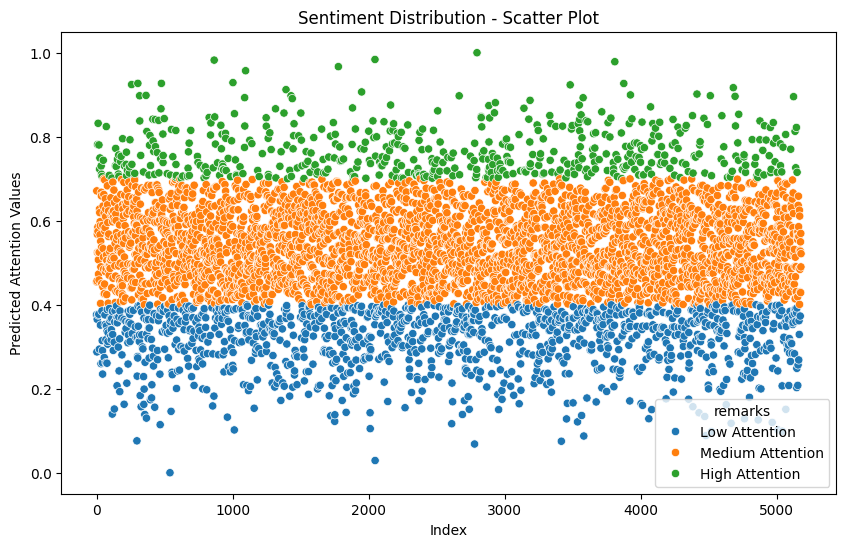

In [96]:
#FORMED SCATTERPLOT WHERE COMBINED SENTIMENT ANALYSIS HAS BEEN DONE OF ALL THE VALUES OF THE COLUMNS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y="predicted_attention_values", hue="remarks", data=df)
plt.title('Sentiment Distribution - Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Predicted Attention Values')
plt.show()


## SENTIMENT ANALYSIS OF TEST DATASET

In [97]:
df2=pd.read_csv("test_data.csv")

In [98]:
df2

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,CP6,CP2,P4,P8,PO4,O2,predicted_attention_values,predicted_attention_values_xgb,predicted_attention_values_rf,predicted_attention_values_dt
0,6.320162,-0.234559,2.356869,-1.823733,-3.340450,2.554415,-1.001115,0.128430,-5.459169,3.884633,...,-6.415714,-6.378561,-3.018486,-2.960473,-11.917199,-4.147639,0.524197,0.525641,0.493411,0.562645
1,6.416361,9.940408,-6.074991,1.620283,-19.115582,-4.000969,-12.087116,-2.346815,-19.469181,8.820455,...,-31.784799,-17.029655,-7.863908,13.603051,-28.432839,-4.090133,0.610503,0.607269,0.597498,0.658009
2,1.141580,3.970722,-1.998272,-2.415111,-7.764394,-1.820080,-5.211620,18.033496,-13.912580,8.239763,...,-18.061967,-9.149463,-3.844114,7.463727,-18.134838,-2.518747,0.554600,0.540271,0.540501,0.609652
3,2.950906,7.546574,10.772559,18.865801,10.379121,3.075893,2.225614,11.453573,7.173757,-12.479187,...,11.622114,4.094541,-3.570784,-1.053991,11.607503,-2.681590,0.229576,0.181692,0.156875,0.281591
4,1.583368,-1.353345,4.790410,2.884923,9.139601,2.500170,1.362362,-14.288733,7.165662,-11.530635,...,16.916151,10.516769,6.717784,-2.470102,25.136304,8.324033,0.390916,0.378140,0.324538,0.423303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,-3.077082,14.155471,-1.875189,11.180827,-10.688096,-6.160869,-12.723077,13.581435,-20.138417,-1.173425,...,-16.231965,-11.410199,-8.720025,6.688255,-23.291725,-7.426291,0.398298,0.383852,0.382706,0.459261
1292,1.726140,6.488863,2.587332,4.473817,-1.580043,-1.609830,-3.549334,-0.566513,-2.494606,-4.856825,...,-3.933630,-3.387129,0.137872,3.912593,3.579224,4.621977,0.419394,0.397381,0.377072,0.450417
1293,-0.001702,2.552379,-4.160969,-7.023043,-10.799516,-1.594333,-2.870665,8.697271,-5.882982,10.884279,...,-23.735997,-10.718012,-5.548869,4.624518,-19.981360,-1.348932,0.685756,0.695151,0.676771,0.737980
1294,0.169927,9.209893,-1.758832,8.283532,-5.959253,-3.519469,-6.430982,10.588683,-5.725497,-3.770494,...,-7.945296,-3.945365,-5.486382,6.093570,-9.411298,-6.835111,0.373332,0.341231,0.332217,0.400705


In [99]:
#DID SAME COLUMN DISTRIBUTION THAT WE DID ON TRAINING DATASET
df2["remarks"] = ""
df2["remarks"] = df2["remarks"].astype(str)
df2["remarks"] = df2["predicted_attention_values"].apply(lambda x: analyze_sentiment(x))

df2["remarks_rf"] = ""
df2["remarks_rf"] = df2["remarks_rf"].astype(str)
df2["remarks_rf"] = df2["predicted_attention_values_rf"].apply(lambda x: analyze_sentiment(x))


df2["remarks_xgb"] = ""
df2["remarks_xgb"] = df2["remarks_xgb"].astype(str)
df2["remarks_xgb"] = df2["predicted_attention_values_xgb"].apply(lambda x: analyze_sentiment(x))


df2["remarks_dt"] = ""
df2["remarks_dt"] = df2["remarks_dt"].astype(str)
df2["remarks_dt"] = df2["predicted_attention_values_dt"].apply(lambda x: analyze_sentiment(x))



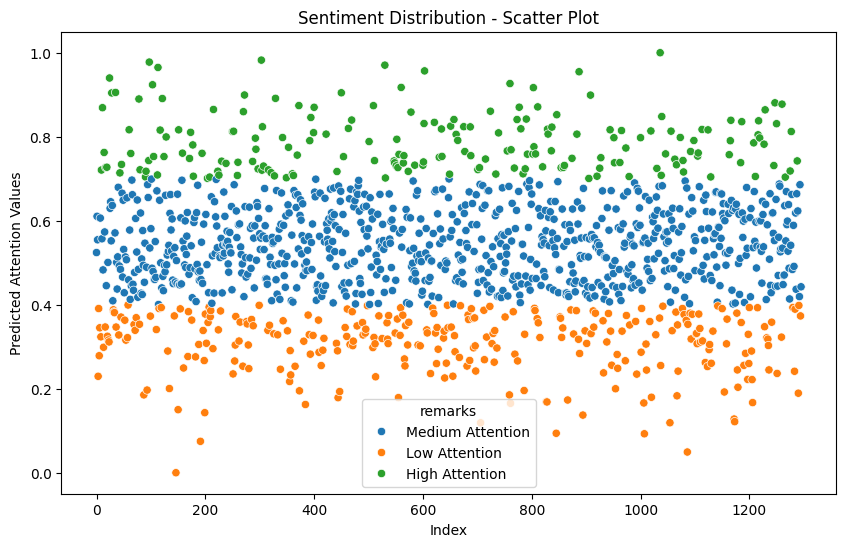

In [100]:
#PLOTTING THE SCATTERPLOT THAT WE DID AS IN TRAIN DATASET
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2.index, y="predicted_attention_values", hue="remarks", data=df2)
plt.title('Sentiment Distribution - Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Predicted Attention Values')
plt.show()


# CONCLUSION

Based on the scatterplots, the model's performance on the test data appears to be similar to its performance on the training data.
Both datasets show a similar distribution of predicted attention values across different sentiment categories.
This suggests that the model generalizes well to unseen data.
However, a more detailed analysis, such as comparing specific metrics like accuracy or F1-score, would provide a more conclusive judgement.